# 股市資料蒐集、爬蟲



## 取得證交所資料
1. 進入證交所網址：https://www.twse.com.tw/zh/index.html
2. 使用開發者模式取得請求資料網址

### 匯入套件

In [ ]:
# 發送 HTTP 請求以獲取網路上的資料
import requests

# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

### 取得證交所上市公司個股日成交資訊

In [ ]:
# "上銀科技"股票代號
stock_id = '2049'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")
# date = 20250912

print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
# https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20250912&stockNo=2303
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，
# 方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])

df

今日日期： 20250914


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,114/09/01,"2,887,580","606,547,916",214.50,215.50,207.00,207.00,-6.50,"4,411"
1,114/09/02,"2,859,723","587,071,015",208.50,209.50,203.00,204.50,-2.50,"3,964"
2,114/09/03,"1,334,423","274,726,403",206.00,207.50,204.50,205.00,+0.50,"1,823"
3,114/09/04,"1,570,522","326,268,789",207.50,210.00,206.00,206.00,+1.00,"2,081"
4,114/09/05,"1,015,289","210,577,190",207.50,209.00,206.00,208.00,+2.00,"1,999"
5,114/09/08,"2,317,556","474,974,942",207.00,207.50,203.00,206.00,-2.00,"3,512"
6,114/09/09,"20,243,237","4,491,417,993",212.50,226.50,212.00,220.50,+14.50,"15,976"
7,114/09/10,"9,685,869","2,111,452,977",223.50,223.50,215.00,216.00,-4.50,"32,524"
8,114/09/11,"4,004,428","857,322,389",218.50,219.00,210.00,211.00,-5.00,"5,124"
9,114/09/12,"6,957,133","1,514,175,553",218.50,220.00,215.00,217.50,+6.50,"6,603"


### 抓取特定某段時間區間 9/8~9/12
為了比較時間區間，必須要把「日期」欄位轉圜為 Pandas 中的 datetime 格式

In [ ]:
def convert_minguo_to_ad(date_str):
    # 114/09/12 透過「/」分割成清單 [114, 09, 12]
    # 分配給變數 year=114, month=09, day=12
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

# 所有民國日期都轉西元日期 e.g.114/09/12 -> 2025/09/12
df['日期'] = df['日期'].apply(convert_minguo_to_ad)

# 轉換為 pandas 中的 datetime 格式
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

start_date = '2025/09/08'
end_date = '2025/09/12'

# 篩選日期
filtered_df = df[(df['日期'] >= start_date) & (df['日期'] <= end_date)]

print(filtered_df)

          日期        成交股數           成交金額     開盤價     最高價     最低價     收盤價  \
5 2025-09-08   2,317,556    474,974,942  207.00  207.50  203.00  206.00   
6 2025-09-09  20,243,237  4,491,417,993  212.50  226.50  212.00  220.50   
7 2025-09-10   9,685,869  2,111,452,977  223.50  223.50  215.00  216.00   
8 2025-09-11   4,004,428    857,322,389  218.50  219.00  210.00  211.00   
9 2025-09-12   6,957,133  1,514,175,553  218.50  220.00  215.00  217.50   

     漲跌價差    成交筆數  
5   -2.00   3,512  
6  +14.50  15,976  
7   -4.50  32,524  
8   -5.00   5,124  
9   +6.50   6,603  


### 取得連續月份資料
以個股本益比為例

In [ ]:
# 設定查找時間
date_list = ['20250701', '20250801', '20250901']

all_df = pd.DataFrame()

# 使用迴圈抓取連續月份資料
for date in date_list:
    # 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
    # https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20250912&stockNo=2303
    # https://www.twse.com.tw/rwd/zh/afterTrading/BWIBBU?date=20250912&stockNo=2303
    url = f'https://www.twse.com.tw/rwd/zh/afterTrading/\
      BWIBBU?date={date}&stockNo={stock_id}'

    try:

        # 取得證交所網站資
        stock_data = requests.get(url)

        # 將結果轉換 JSON 格式
        json_data = stock_data.json()

        # 將 JSON 格式轉換爲 Dataframe 格式，
        # 方便在 Python 中處理結構化資料
        df = pd.DataFrame(data=json_data['data'],
                          columns=json_data['fields'])

        # 添加新數據
        all_df = pd.concat([all_df, df], ignore_index=True)

    except Exception as e:

        # 發生錯誤時，列印錯誤訊息
        print(f'無法取得{date}的資料, 可能資料量不足.')


# 輸出前 5 筆資料
print(all_df)

            日期 殖利率(%)  股利年度    本益比 股價淨值比  財報年/季
0   114年07月01日   1.15   113  35.91  2.03  114/1
1   114年07月02日   1.14   113  36.17  2.04  114/1
2   114年07月03日   1.08   113  38.32  2.16  114/1
3   114年07月04日   1.11   113  37.11  2.10  114/1
4   114年07月07日   1.16   113  35.48  2.00  114/1
5   114年07月08日   1.19   113  34.62  1.96  114/1
6   114年07月09日   1.17   113  35.22  1.99  114/1
7   114年07月10日   1.19   113  34.71  1.96  114/1
8   114年07月11日   1.15   113  35.74  2.02  114/1
9   114年07月14日   1.17   113  35.31  1.99  114/1
10  114年07月15日   1.15   113  35.74  2.02  114/1
11  114年07月16日   1.17   113  35.40  2.00  114/1
12  114年07月17日   1.12   113  36.77  2.08  114/1
13  114年07月18日   1.12   113  36.68  2.07  114/1
14  114年07月21日   1.12   113  36.94  2.09  114/1
15  114年07月22日   1.15   113  35.91  2.03  114/1
16  114年07月23日   1.10   113  37.37  2.11  114/1
17  114年07月24日   1.11   113  37.29  2.11  114/1
18  114年07月25日   1.11   113  37.20  2.10  114/1
19  114年07月28日   1.12   113  36.77  2.08

## 使用 Yahoo Finance 取得資料

###匯入套件

In [ ]:
!pip install yfinance

In [ ]:
# yahoo finance 套件
import yfinance as yf
# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

In [ ]:
# 輸入股票代號
stock_id = "2049.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

'''抓取特定時間'''
# start = dt.datetime(2025, 9, 8)  # 指定的開始日期
# end = dt.datetime(2025, 9, 12)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-1739616675.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2025-03-18,296.010681,299.469904,293.539807,296.504856,4496556
1,2025-03-19,281.185425,297.493191,279.702901,295.516492,7256402
2,2025-03-20,282.667969,286.621367,276.737872,284.644668,6605923
3,2025-03-21,275.749512,285.633007,275.255337,283.656308,5433242
4,2025-03-24,267.842712,281.679605,265.866013,277.726207,8652741
...,...,...,...,...,...,...
119,2025-09-08,206.000000,207.500000,203.000000,207.000000,2233315
120,2025-09-09,220.500000,226.500000,212.000000,212.500000,19874099
121,2025-09-10,216.000000,223.500000,215.000000,223.500000,9545240
122,2025-09-11,211.000000,219.000000,210.000000,218.500000,3888819


# <b>資料可視化</b>

## 可視化收盤價折線圖

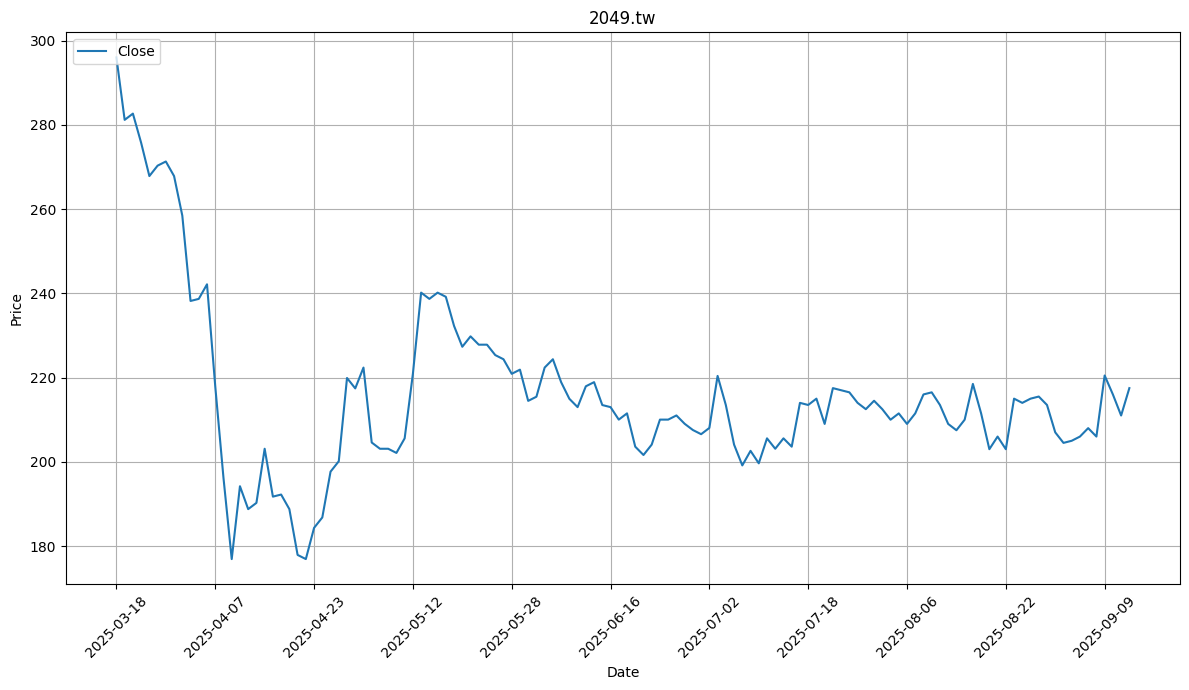

In [ ]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 用 BeautifulSoup4 取得 Yahoo 股市資料

### ⚠️ 如果過度頻繁爬取證交所的資料(約連續50次)會被偵測並封鎖IP，可以搭配time、sleep延遲回應避免被認為是機器人程式。

###匯入套件

In [ ]:
# 用來處理時間
from datetime import datetime, timedelta
# 解析網頁內容
from bs4 import BeautifulSoup

### 取得股價資料

In [ ]:
def yahoo_stock(stock_id):
    # 取得證交所網站資，帶入網址參數 date：時間，stock_id：股票代號
    url = f'https://tw.stock.yahoo.com/quote/{stock_id}.TW'

    # 使用 requests 取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用 Beautiful Soup 解析 HTML 內容
    soup = BeautifulSoup(html, 'html.parser')

    # 使用 find 與 find_all 定位 HTML 的標籤
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 time
    time_element = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('time')
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 ul li
    table_soups = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('ul')\
                                   .find_all('li')

    # 欄位資料
    fields = []
    # 放資料
    datas = []

    # 使用 for 迴圈取得表格中細部內容
    for table_soup in table_soups:

        # 表格中的 span 標籤
        table_datas = table_soup.find_all('span')

        for num, table_data in enumerate(table_datas):

            if table_data.text == '': # 表格內容空就跳過
                continue

            # 新增資料
            if num == 0:
                fields.append(table_data.text)
            else:
                datas.append(table_data.text)

    # 建立 DataFrame
    df = pd.DataFrame([datas], columns=fields)

    # 增加日期和股號欄位
    df.insert(0,'日期',time_element['datatime'])
    df.insert(1,'股號',stock_id)

    # 回傳 DataFrame
    return df


'''main'''

# "聯華電子"股票代號
stock_id = '2049'

# 呼叫定義函數
yahoo_stock(stock_id)

,日期,股號,成交,開盤,最高,最低,均價,成交金額(億),昨收,漲跌幅,漲跌,總量,昨量,振幅
0,2025/09/12 14:30,2049,217.5,218.5,220.0,215.0,217.6,14.94,211.0,3.08%,6.50,"6,863","3,888",2.37%


###取得季報表資訊


In [ ]:
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
words = url.split('/')
print(words)

k = words[-1]
print(k)

['https:', '', 'tw.stock.yahoo.com', 'quote', '2049', 'income-statement']
income-statement


In [ ]:
# 函數可用於奇摩財報
def url_find(url):

    # 取得 url 的所有 route
    words = url.split('/')

    # 取得最後一個 route
    # 為了知道是損益表、資產負債表、現金流量表
    laset_word = words[-1]

    # 使用requests取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用Beautiful Soup解析HTML內容
    soup = BeautifulSoup(html, 'html.parser')

    # 找到表格的表頭 qsp-incom-statment-table
    table_soup = soup.find('section', {'id': 'qsp-{}-table'.format(laset_word)})

    # 找到對應類別標籤
    table_fields=table_soup.find('div', class_='table-header')

    # 解析表頭內容
    table_fields_lines = list(table_fields.stripped_strings)


    # 找到對應的資料
    data_rows = table_soup.find_all('li' ,class_='List(n)')

    # 解析資料行內容
    data = []
    for row in data_rows:
        row_data = list(row.stripped_strings)
        data.append(row_data)

    # 建立 DataFrame
    df = pd.DataFrame(data, columns=table_fields_lines)
    return df

'''main'''

# 抓損益表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
# 抓資產負債表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/balance-sheet'
# 抓現金流量表
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/cash-flow-statement'

# 抓取季報表資料
df = url_find(url).transpose()

# 資料處理
df.columns = df.iloc[0]
df = df[1:]
df.insert(0, '年度/季別', df.index)
df.columns.name = None
df.reset_index(drop=True, inplace=True)

# 輸出資料後5筆
print(df)

      年度/季別      營業現金流       投資現金流       融資現金流      自由現金流        淨現金流
0   2025 Q2    610,246    -691,874     -47,944    -81,628    -404,408
1   2025 Q1  1,042,074    -673,356    -232,406    368,718     221,300
2   2024 Q4  1,019,003  -1,204,919   1,151,695   -185,916     934,359
3   2024 Q3    546,320    -855,062  -1,128,937   -308,742  -1,397,228
4   2024 Q2    886,937    -761,740      87,223    125,197     236,530
5   2024 Q1  1,166,361  -1,061,001    -128,934    105,360      16,268
6   2023 Q4  1,034,266    -686,383    -268,030    347,883      37,309
7   2023 Q3  2,048,265    -676,247  -1,851,943  1,372,018    -418,712
8   2023 Q2  1,156,546    -920,291    -583,183    236,255    -390,213
9   2023 Q1    531,289    -563,113     902,948    -31,824     877,846
10  2022 Q4  1,469,339    -373,173  -1,161,849  1,096,166     -71,904
11  2022 Q3  2,663,279    -538,196  -1,086,407  2,125,083   1,070,386
12  2022 Q2    912,496    -888,774     390,787     23,722     392,307
13  2022 Q1  1,032,4